In [14]:
# importing classes
import pandas as pd
import re
import string
import nltk
import sklearn 

# reading in .CSV file through pandas
df = pd.read_csv('Desktop\Pandas test\Abstract.csv', names=['doi','abstract', 'hall_data'])
df.head()

,doi,abstract,hall_data
0,10.1039/c7ta08869h,?? The Royal Society of Chemistry 2017. Zintl ...,1
1,10.1007/s11664-015-4303-6,"?? 2015, The Minerals, Metals & Materials Soci...",1
2,10.1016/s1002-0721(12)60398-6,"Zintl phase compounds AM2Sb2 (A=Ca, Sr, Ba, Eu...",1
3,10.1039/b916346h,The thermoelectric performance of EuZn2Sb2 and...,1
4,10.1002/aenm.201502269,"?? 2016 Wiley-VCH Verlag GmbH & Co. KGaA, Wein...",1


In [15]:
stopword = nltk.corpus.stopwords.words('english')

# function that removes, punctuation, stopwrods, and tokenizes text
def abstract_clean(text):
    regex = r"(?<!\d)\.(?!\d)"
    text = "".join([char for char in text if char not in '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'])
    period = re.sub(regex, "", text)
    token = re.split('\W+', text)
    stop = [word for word in token if word not in stopword]
    return stop

df['abstract_clean'] =  df['abstract'].dropna().apply(lambda text: abstract_clean(text))
df.head()

,doi,abstract,hall_data,abstract_clean
0,10.1039/c7ta08869h,?? The Royal Society of Chemistry 2017. Zintl ...,1,"[, The, Royal, Society, Chemistry, 2017, Zintl..."
1,10.1007/s11664-015-4303-6,"?? 2015, The Minerals, Metals & Materials Soci...",1,"[, 2015, The, Minerals, Metals, Materials, Soc..."
2,10.1016/s1002-0721(12)60398-6,"Zintl phase compounds AM2Sb2 (A=Ca, Sr, Ba, Eu...",1,"[Zintl, phase, compounds, AM2Sb2, ACa, Sr, Ba,..."
3,10.1039/b916346h,The thermoelectric performance of EuZn2Sb2 and...,1,"[The, thermoelectric, performance, EuZn2Sb2, E..."
4,10.1002/aenm.201502269,"?? 2016 Wiley-VCH Verlag GmbH & Co. KGaA, Wein...",1,"[, 2016, WileyVCH, Verlag, GmbH, Co, KGaA, Wei..."


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizing by applying tf-idf method to "abstract"
tfidf_vect = TfidfVectorizer() 
x = tfidf_vect.fit_transform(df['abstract'].values.astype('str'))
y = df['hall_data']

In [31]:
from sklearn.linear_model import LogisticRegression

logmod = LogisticRegression(solver='liblinear', C=1000.0, penalty='l2', random_state=0)

In [74]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split

# splitting the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

# Using gridsearch to find optimal parameters
gs={"C": np.logspace(-3,3,7), "penalty": ["l1","l2"]}
logmod_cv=GridSearchCV(logmod, gs, cv=10)
logmod_cv.fit(x_train,y_train)
prediction_cv = logmod_cv.predict(x_test)

print("tuned hpyerparameters :(best parameters) ",logmod_cv.best_params_)
print("accuracy:",logmod_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy: 0.8916666666666666


roc_auc_score for Logistic Regression:  0.9148606811145512


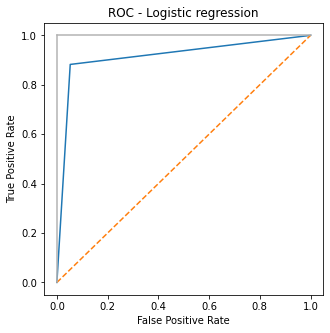

In [75]:
# plotting ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
         
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, prediction_cv)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, prediction_cv))
    
plt.subplots(1, figsize=(5,5))
plt.title('ROC - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], linestyle="--")
plt.plot([0, 0], [1, 0] , c=".7") 
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


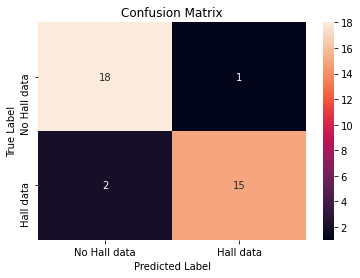

In [76]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, prediction_cv)
class_label = ["No Hall data", "Hall data"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()